In [ ]:
%matplotlib inline

import numpy as np
import glob
from pathlib import Path
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import community as community_louvain
from pyvis.network import Network

In [ ]:
# Utilies (Save Graph as File)
def save_graph(graph, file_name):
    # initialze Figure
    nt = Network('800px', '1200px')
    # populates the nodes and edges data structures
    nt.from_nx(graph)
    nt.show(f'{file_name}.html')


def plot_graph(graph, title):
    partition = community_louvain.best_partition(graph)
    pos = nx.spring_layout(graph, k=10)  # For better example looking
    # nx.draw(graph, pos, with_labels=True)
    cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
    nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                           cmap=cmap, node_color=list(partition.values()))
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    nx.draw_networkx_labels(G, pos)
    plt.title(title)
    plt.show()


def print_graph_analytics(graph, title):
    print(f"{title} - nodes:                {nx.number_of_nodes(graph)}")
    print(f"{title} - edges:                {nx.number_of_edges(graph)}")
    print(f"{title} - density:              {nx.density(graph)}")
    print(f"{title} - avg-clustering:       {nx.algorithms.average_clustering(graph)}")
    #print(f"{title} - wiener-index:         {nx.algorithms.wiener_index(graph)}")
    #print(f"{title} - small-world sigma:    {nx.sigma(graph)}")
    #print(f"{title} - small-world omega:    {nx.omega(graph)}")


def calculate_graph_measures(graph, relevant_nodes):
    # betweenness_centrality
    betweenness_centrality = nx.betweenness_centrality(graph)
    betweenness_centrality_filtered = dict(
        filter(lambda elem: elem[0] in relevant_nodes, betweenness_centrality.items()))

    # # closness_centrality
    closeness_centrality = nx.closeness_centrality(graph)
    closeness_centrality_filtered = dict(filter(lambda elem: elem[0] in relevant_nodes, closeness_centrality.items()))

    # # average_degree_connectivity
    avg_local_degree = nx.algorithms.assortativity.average_degree_connectivity(graph)
    avg_local_degree_filtered = dict(filter(lambda elem: elem[0] in relevant_nodes, avg_local_degree.items()))
    return {
        'nodes': nx.number_of_nodes(graph),
        'edges': nx.number_of_edges(graph),
        'density': nx.density(graph),
        'avg_clustering': nx.algorithms.average_clustering(graph),
        'wiener_index': nx.algorithms.wiener_index(graph),
        'betweenness_centrality': np.average(list(betweenness_centrality_filtered.values())),
        'closness_centrality': np.average(list(closeness_centrality_filtered.values())),
        'average_degree_connectivity': np.average(list(avg_local_degree_filtered.values())),
        'local_clustering_coefficent': nx.algorithms.approximation.average_clustering(graph)
    }


def normalize_values(x, y):
    normalized = np.e ** -(x - y) ** 2
    # print(f'normalized value of {x} and {y}: {normalized}')
    return normalized

# The next step is to read all single gene-networks and plot them
> Note: Run this in the online jupyter notebook if its not working

## Alzheimer Disease

In [ ]:
path = "data/ad/genes/*.csv"
for fname in glob.glob(path):
    df = pd.read_csv(fname)
    Graphtype = nx.Graph()
    file_name = Path(fname).stem
    G = nx.from_pandas_edgelist(df, source="Source", target="Target",
                                create_using=Graphtype)
    print_graph_analytics(G, file_name)
    plot_graph(G, file_name)

## Schizophrenia

In [ ]:
path = "data/schiz/genes/*.csv"
for fname in glob.glob(path):
    df = pd.read_csv(fname)
    Graphtype = nx.Graph()
    file_name = Path(fname).stem
    G = nx.from_pandas_edgelist(df, source="Source", target="Target",
                                create_using=Graphtype)
    print_graph_analytics(G, file_name)
    plot_graph(G, file_name)

# Read CSV Files (AD Network Full and Schizophrenia Network Full)

In [45]:
df_ad = pd.read_csv('data/ad/ad_network_full_with_labels.csv', sep=",")
df_schiz = pd.read_csv('data/schiz/schiz_network_full_with_labels.csv', sep=",")

# Create networkX Graph from Pandas Edgelist (AD Network)
> Note: This will take some time

In [ ]:
Graphtype = nx.Graph()
G = nx.from_pandas_edgelist(df_ad, source="Source", target="Target",
                            create_using=Graphtype, edge_attr=True)
# save_graph(G, file_name="ad_network_graph")
# print_graph_analytics(G, "ad_network_graph")
# plot_graph(G, "alzheimer disease")
relevant_genes = ["APP", "HFE", "MPO", "NOS3", "PLAU"]
measures_AD = calculate_graph_measures(G, relevant_genes)
print('measures for alzheimer disease calculated')

# Create networkX Graph from Pandas Edgelist (Schizophrenia Network)
> Note: This will take some time

In [ ]:
Graphtype = nx.Graph()
G = nx.from_pandas_edgelist(df_schiz, source="Source", target="Target",
                            create_using=Graphtype, edge_attr=True)
# save_graph(G, file_name="schiz_network_graph")
# print_graph_analytics(G, "schiz_network_graph")
# plot_graph(G, "schizophrenia network full")
# relevant_genes = ["APOL2", "APOL4", "CHI3L1", "COMT", "DAOA", "DISC1", "DRD3", "HTR2A", "MTHFR", "RTN4R", "SYN2"]
# measures_schiz = calculate_graph_measures(G, relevant_genes)
# print('measures for schizophrenia disease calculated')


# Comparing and normalizing measures of AD and Schizophrenia Networks

In [ ]:
print(measures_AD)
print(measures_schiz)

for i in range(len(measures_AD)):
    normalized = normalize_values(list(measures_AD.values())[i], list(measures_schiz.values())[i])
    print(f'Comparing measure "{list(measures_AD.keys())[i]}": {list(measures_AD.values())[i]} to \
    {list(measures_schiz.values())[i]} -> normalized: {normalized}')

# Now we read the whole Homo-Sapiens Gene Network

In [ ]:
df_all = pd.read_csv('data/all_protein_combined_with_labels.csv', sep=",")

In [ ]:
Graphtype = nx.Graph()
G = nx.from_pandas_edgelist(df_all, source="Source", target="Target",
                            create_using=Graphtype, edge_attr=True)

closeness = nx.closeness_centrality(G)
print(f"closeness {closeness}")
clustering = nx.average_clustering(G)
print(f"clustering {clustering}")
APP = G.nodes["APP"]
print(APP)
print_graph_analytics(G, "full_homo_sapiens_network")

# save_graph(G, file_name="ad_network_graph")


In [65]:
import json

    
relevant_schiz_genes = ["APOL2", "APOL4", "CHI3L1", "COMT", "DAOA", "DISC1", "DRD3", "HTR2A", "MTHFR", "RTN4R", "SYN2"]
relevant_ad_genes = ["APP", "HFE", "MPO", "NOS3", "PLAU"]

relevant_genes = relevant_schiz_genes + relevant_ad_genes
relevant_gene_measures = {}
print(relevant_genes)
            
def dict_path(path,my_dict):
    path = path.strip(".")
    for k,v in my_dict.items():
        if(k in relevant_genes): 
            relevant_gene_measures[f"{path}.{k}"] = v
            print(f"{path}.{k}: {v}")
        if isinstance(v,dict):
            dict_path(f"{path}.{k}", v)
            

            
with open('measures_not_filtered/measures_alzheimer.json') as json_file:
    ad_measures = json.load(json_file)

with open('measures_not_filtered/measures_schizophrenia.json') as json_file:
    schiz_measures = json.load(json_file)

dict_path("", ad_measures)
dict_path("", schiz_measures)

['APOL2', 'APOL4', 'CHI3L1', 'COMT', 'DAOA', 'DISC1', 'DRD3', 'HTR2A', 'MTHFR', 'RTN4R', 'SYN2', 'APP', 'HFE', 'MPO', 'NOS3', 'PLAU']
betweenness_centrality.APP: 0.46147779197112815
betweenness_centrality.HFE: 0.2469183726091703
betweenness_centrality.MPO: 0.16411629364467512
betweenness_centrality.NOS3: 0.21183453736553687
betweenness_centrality.PLAU: 0.12131401644635922
betweenness_centrality.RTN4R: 0.0
betweenness_centrality.CHI3L1: 0.0
betweenness_centrality.MTHFR: 6.445313944043115e-05
betweenness_centrality.COMT: 6.445313944043115e-05
betweenness_centrality.APOL2: 0.0
betweenness_centrality.HTR2A: 0.0
betweenness_centrality.DRD3: 0.0
betweenness_centrality.SYN2: 0.0
betweenness_centrality.DAOA: 0.0
betweenness_centrality.DISC1: 0.0
closness_centrality.APP: 0.6605902777777778
closness_centrality.HFE: 0.535255846667839
closness_centrality.MPO: 0.5554744525547445
closness_centrality.NOS3: 0.5523999637056528
closness_centrality.PLAU: 0.5410593672236047
closness_centrality.RTN4R: 0.39

In [ ]:
for key,value in relevant_gene_measures.items():
    print(f"{key}: {value}")

In [80]:
df_ad = pd.read_csv('data/ad/ad_network_full_with_labels.csv', sep=",")
df_schiz = pd.read_csv('data/schiz/schiz_network_full_with_labels.csv', sep=",")

In [82]:
Graphtype = nx.Graph()
ad_graph = nx.from_pandas_edgelist(df_ad, source="Source", target="Target",
                            create_using=Graphtype)

In [83]:
Graphtype = nx.Graph()
schiz_graph = nx.from_pandas_edgelist(df_schiz, source="Source", target="Target",
                            create_using=Graphtype)

In [87]:
print(np.average(list(nx.clustering(schiz_graph).values())))
print(np.average(list(nx.clustering(ad_graph).values())))

print(nx.approximation.average_clustering(schiz_graph))
print(nx.approximation.average_clustering(ad_graph))

print(nx.average_clustering(schiz_graph, count_zeros=False))
print(nx.average_clustering(ad_graph, count_zeros=False))


0.38371237056286983
0.40280584579240086
0.395
0.397
0.9122550521419824
0.9795067072803214


In [54]:
ad_betweenness = nx.betweenness_centrality(ad_graph)
schiz_betweenness = nx.betweenness_centrality(schiz_graph)

In [66]:
# degree
schiz_degree = {}
ad_degree = {}
# betweenness
schiz_betweenness_d = {}
ad_betweenness_d = {}
# closeness
schiz_closeness = {}
ad_closeness = {}
# local_cluster
schiz_cluster = {}
ad_cluster = {}

for n in relevant_ad_genes:
    ad_degree[n] = ad_graph.degree(n)
    ad_closeness[n] = nx.closeness_centrality(ad_graph, u=n)
    ad_cluster[n] = nx.clustering(ad_graph, nodes=n)
    ad_betweenness_d[n] = ad_betweenness[n] 
    
for n in relevant_schiz_genes:
    schiz_degree[n] = schiz_graph.degree(n)
    schiz_closeness[n] = nx.closeness_centrality(schiz_graph, u=n)
    schiz_cluster[n] = nx.clustering(schiz_graph, nodes=n)
    schiz_betweenness_d[n] = schiz_betweenness[n]
    

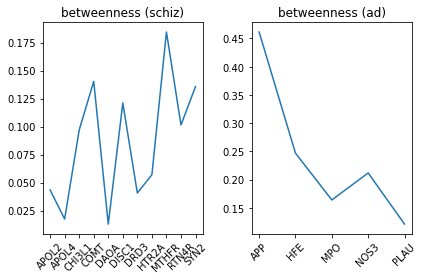

In [67]:
import matplotlib.pyplot as plt
lists = schiz_betweenness_d.items()
x, y = zip(*lists)
plt.subplot(1, 2, 1)
plt.xticks(rotation = 45)
plt.title("betweenness (schiz)")
plt.plot(x,y)
plt.subplots_adjust(left=.89)
plt.subplot(1, 2, 2)
lists = ad_betweenness_d.items()
x, y = zip(*lists)
plt.xticks(rotation = 45)
plt.title("betweenness (ad)")
plt.tight_layout()
plt.plot(x,y)

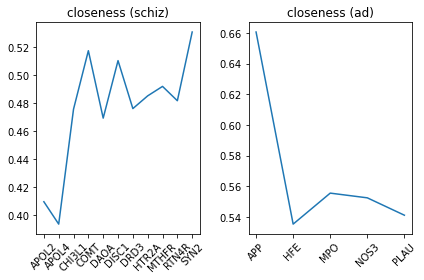

In [68]:
lists = schiz_closeness.items()
x, y = zip(*lists)
plt.subplot(1, 2, 1)
plt.xticks(rotation = 45)
plt.title("closeness (schiz)")
plt.plot(x,y)
plt.subplots_adjust(left=.89)
plt.subplot(1, 2, 2)
lists = ad_closeness.items()
x, y = zip(*lists)
plt.xticks(rotation = 45)
plt.title("closeness (ad)")
plt.tight_layout()
plt.plot(x,y)

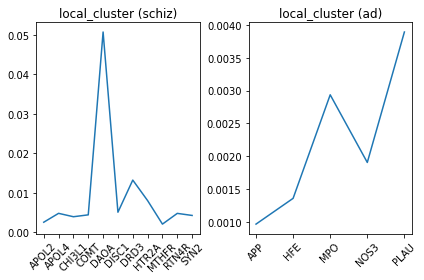

In [69]:
lists = schiz_cluster.items()
x, y = zip(*lists)
plt.subplot(1, 2, 1)
plt.xticks(rotation = 45)
plt.title("local_cluster (schiz)")
plt.plot(x,y)
plt.subplots_adjust(left=.89)
plt.subplot(1, 2, 2)
lists = ad_cluster.items()
x, y = zip(*lists)
plt.xticks(rotation = 45)
plt.title("local_cluster (ad)")
plt.tight_layout()
plt.plot(x,y)

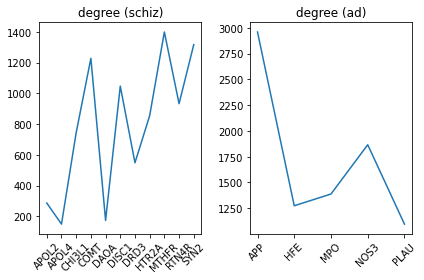

In [70]:
lists = schiz_degree.items()
x, y = zip(*lists)
plt.subplot(1, 2, 1)
plt.xticks(rotation = 45)
plt.title("degree (schiz)")
plt.plot(x,y)
plt.subplots_adjust(left=.89)
plt.subplot(1, 2, 2)
lists = ad_degree.items()
x, y = zip(*lists)
plt.xticks(rotation = 45)
plt.title("degree (ad)")
plt.tight_layout()
plt.plot(x,y)